In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                    'machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
forest = RandomForestClassifier(random_state=1)
param_range = [200,300,400,500,600,700,1000]
param_grid = [{'n_estimators': param_range}]

gs = GridSearchCV(estimator=forest,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [3]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.98125
{'n_estimators': 300}


In [4]:
feat_labels = df_wine.columns[1:]
best_forest = RandomForestClassifier(random_state=1,n_estimators=gs.best_params_['n_estimators'])
best_forest.fit(X_train,y_train)
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.177709
 2) Flavanoids                     0.151071
 3) Alcohol                        0.138728
 4) Color intensity                0.137597
 5) OD280/OD315 of diluted wines   0.123891
 6) Hue                            0.095673
 7) Total phenols                  0.046317
 8) Malic acid                     0.032669
 9) Magnesium                      0.026135
10) Alcalinity of ash              0.025652
11) Proanthocyanins                0.019780
12) Ash                            0.013997
13) Nonflavanoid phenols           0.010782


(-1, 13)

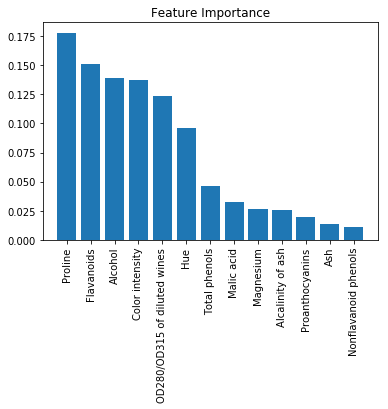

In [5]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

In [6]:
gs.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.44072142, 0.8315469 , 0.88663471, 1.21015818, 1.38192399,
        1.77472975, 2.58841133]),
 'std_fit_time': array([0.03719552, 0.1035591 , 0.05453303, 0.07941631, 0.11846629,
        0.12013382, 0.13240995]),
 'mean_score_time': array([0.0226752 , 0.03341651, 0.0442687 , 0.0535821 , 0.0626673 ,
        0.1259063 , 0.10347774]),
 'std_score_time': array([0.00609602, 0.00378475, 0.00641867, 0.00531853, 0.00350057,
        0.02839312, 0.02976289]),
 'param_n_estimators': masked_array(data=[200, 300, 400, 500, 600, 700, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400},
  {'n_estimators': 500},
  {'n_estimators': 600},
  {'n_estimators': 700},
  {'n_estimators': 1000}],
 'split0_test_score': array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
        0.94444444, 0.94444444]),
 'split1_te

In [7]:
print("My name is {Changjie Ma}")
print("My NetID is: {cma17}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Changjie Ma}
My NetID is: {cma17}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
